In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'C:\Users\Shruthi Mrinalan\Downloads\insurance (1).csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

In [2]:
#Shape of the data
print(df.shape)

(1338, 7)


In [6]:
#Data type of each attribute
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
#Checking the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
print("No null values")


No null values


In [7]:
#5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


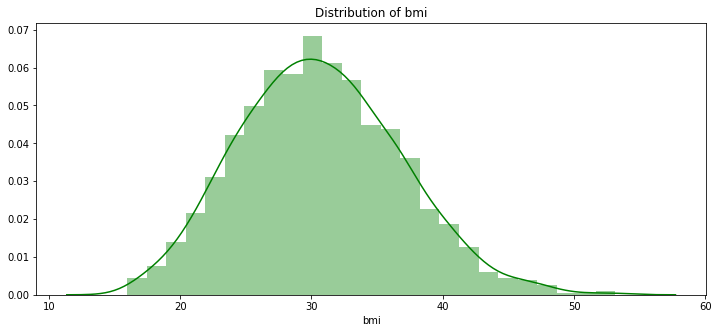

In [19]:
#Distribution of ‘bmi’
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'g')

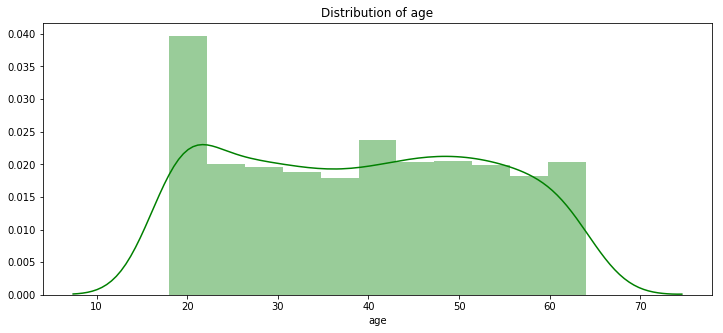

In [16]:
Distribution of ‘age’ 
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

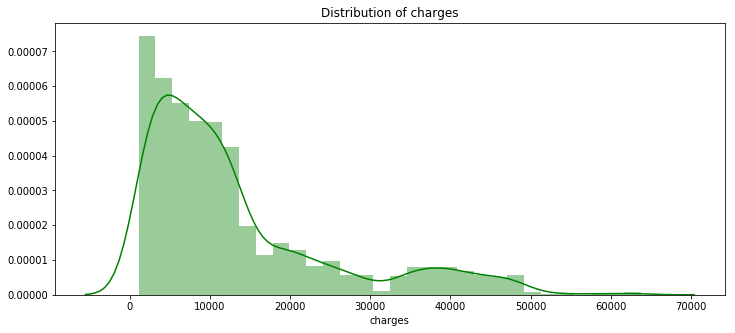

In [17]:
#Distribution of  ‘charges’ colum
pl.figure(figsize=(12,5))
pl.title("Distribution of charges")
ax = sns.distplot(df["charges"], color = 'g')

In [27]:
#Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
print("Skew Meauserments")
print(df.skew(axis = 0, skipna = True) )


Skew Meauserments
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


In [41]:
print("Charges have higher skew while age has the lower skewness")

Charges have higher skew while age has the lower skewness


In [ ]:
#Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
df.sort()

In [73]:
df.sort_values(by=['age'])
QR = df["age"].quantile(q=.25)
QR3 = df["age"].quantile(q=.75)
IQr = QR3-QR
print('ICR ',QR3-QR)

ICR  24.0


In [75]:
lower_bound = QR -(1.5 * IQr) 
upper_bound = QR3 +(1.5 * IQr) 
print(lower_bound ,upper_bound)

-9.0 87.0


In [76]:
df[(df.age < lower_bound) | (df.age  > upper_bound)]

,age,sex,bmi,children,smoker,region,charges


In [71]:
print("Outliers for dont exist for age")

Outliers for dont exist for age


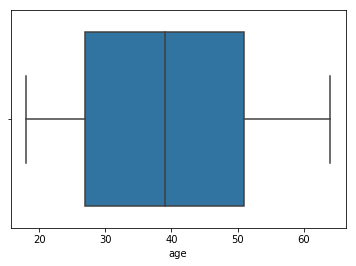

In [40]:
#check any age are there in age column graphically
sns.boxplot(x='age',data=df)
plt.show()

In [78]:
df.sort_values(by=['bmi'])
QR = df["bmi"].quantile(q=.25)
QR3 = df["bmi"].quantile(q=.75)
IQr = QR3-QR
print('ICR ',QR3-QR)
lower_bound = QR -(1.5 * IQr) 
upper_bound = QR3 +(1.5 * IQr) 
print("lower limit: ",lower_bound ,"Upper limit: ",upper_bound)
print("Outliers for BMI")
df[(df.bmi < lower_bound) | (df.bmi  > upper_bound)]

ICR  8.3975
lower limit:  13.7 Upper limit:  47.290000000000006
Outliers for BMI


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


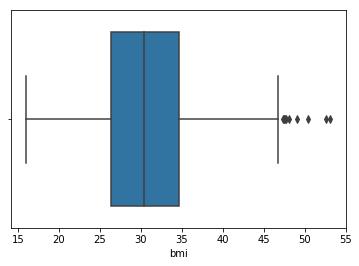

In [38]:
#check any outliers are there in bmi column graphically
sns.boxplot(x='bmi',data=df)
plt.show()

In [80]:
df.sort_values(by=['charges'])
QR = df["charges"].quantile(q=.25)
QR3 = df["charges"].quantile(q=.75)
IQr = QR3-QR
print('ICR ',QR3-QR)
lower_bound = QR -(1.5 * IQr) 
upper_bound = QR3 +(1.5 * IQr) 
print("lower limit: ",lower_bound ,"Upper limit: ",upper_bound)
print("Outliers for charges")
df[(df.charges < lower_bound) | (df.charges  > upper_bound)]

ICR  11899.625365
lower limit:  -13109.1508975 Upper limit:  34489.350562499996
Outliers for charges


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


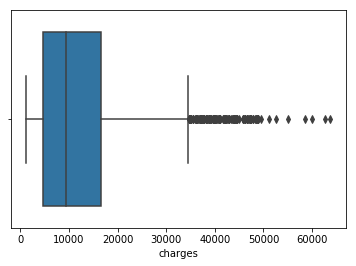

In [37]:
#check any outliers are there in charges column graphically
sns.boxplot(x='charges',data=df)
plt.show()

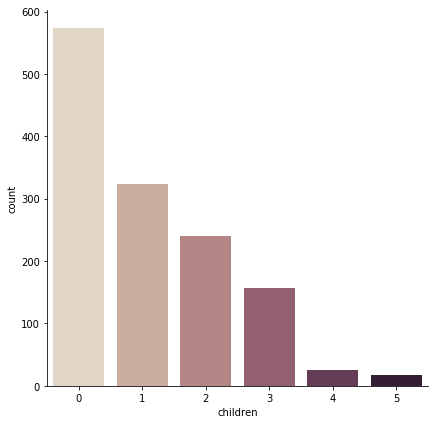

In [82]:
#Distribution of categorical columns
sns.catplot(x="children", kind="count", palette="ch:.25", data=df, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

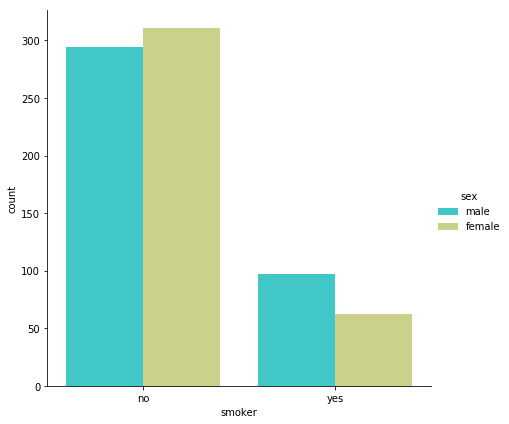

In [83]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

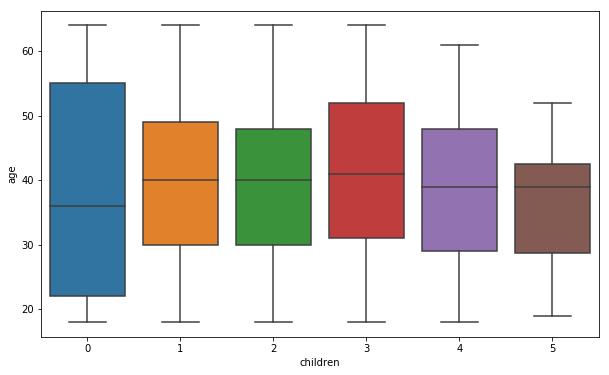

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='age',data=df)
plt.show()

Text(0.5, 1.0, 'Distribution of charges by number of children')

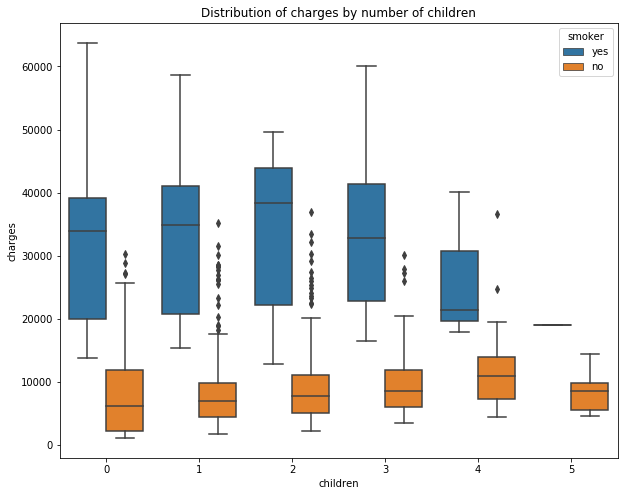

In [17]:
#Charges by smoker and number of children
plt.figure(figsize = (10,8))
sns.boxplot(x = "children", y = "charges",hue = "smoker", data = df)
plt.title("Distribution of charges by number of children")

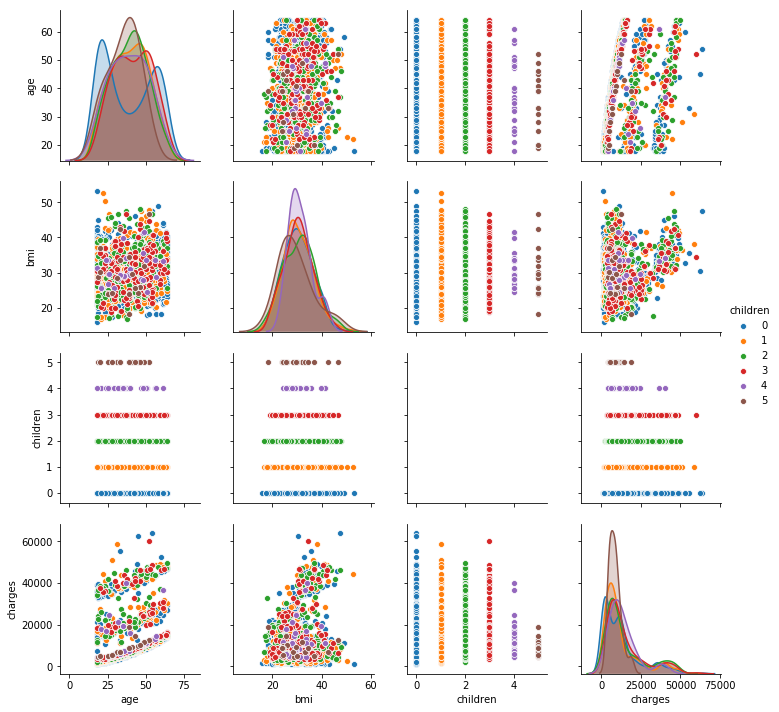

In [42]:
#display graphically the relation between all features and children
sns.pairplot(df,hue='children')
plt.show()

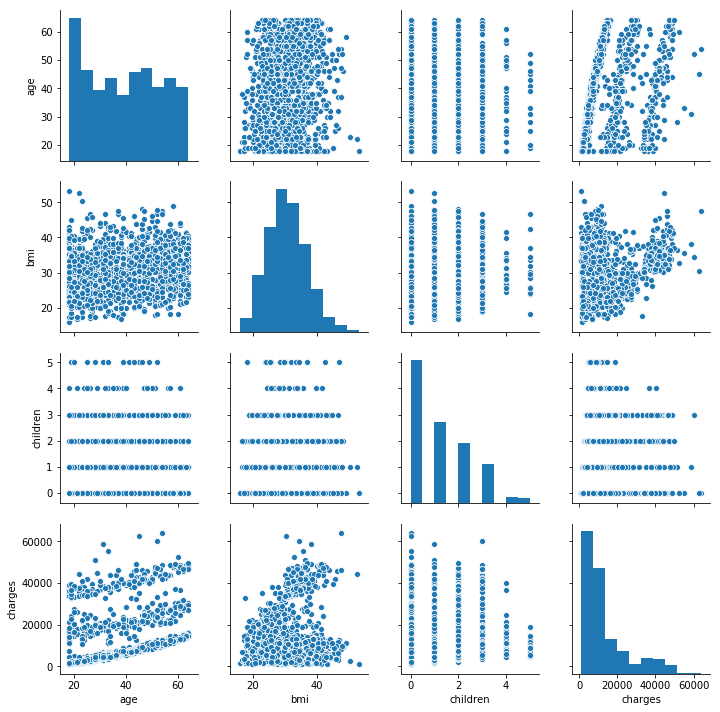

In [54]:
#Pair plot that includes all the columns of the data frame
sns.pairplot(df)
plt.show()

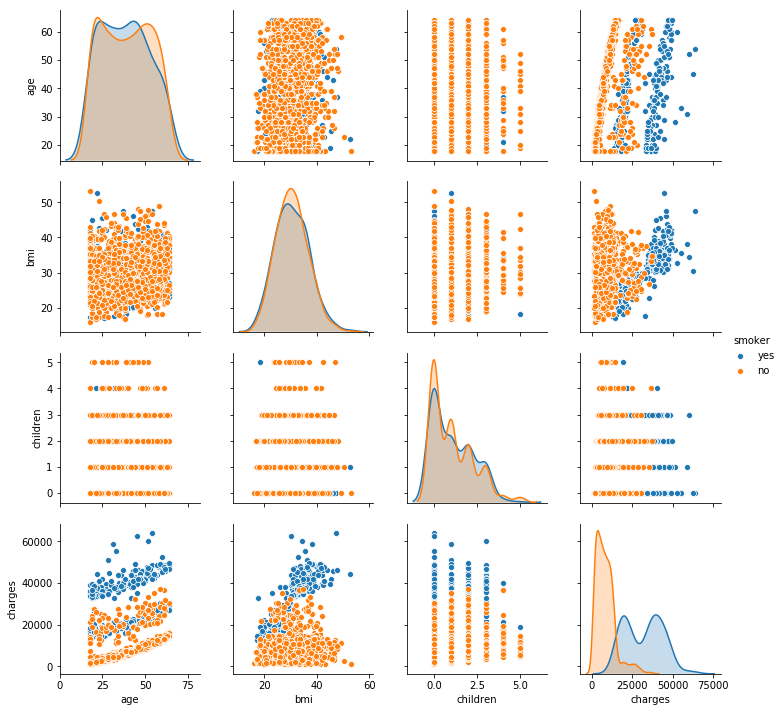

In [27]:
#display graphically the relation between all features and smokers
sns.pairplot(df,hue='smoker')
plt.show()

[[19 'female' 27.9 0 'yes']
 [18 'male' 33.77 1 'no']
 [28 'male' 33.0 3 'no']
 [33 'male' 22.705 0 'no']
 [32 'male' 28.88 0 'no']]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


<Figure size 432x288 with 0 Axes>

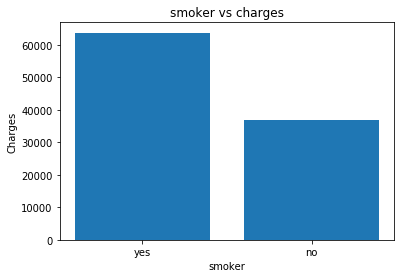

<Figure size 432x288 with 0 Axes>

In [11]:
#Do charges of people who smoke differ significantly from the people who don't?
x=df.iloc[:,:5].values
y=df.iloc[:,6].values
print(x[:5])
print(y[:5])
plt.bar(df['smoker'],y,)
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.figure()

Smokers seem to have a signficant effect on insurance charges


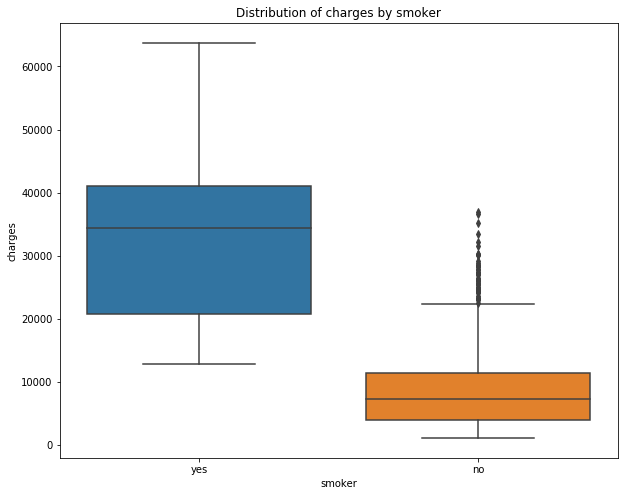

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.title("Distribution of charges by smoker")
print("Smokers seem to have a signficant effect on insurance charges")

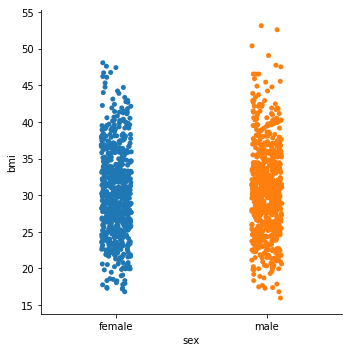

In [9]:
#Does bmi of males differ significantly from that of females?

sns.catplot(x="sex", y="bmi", data=df);

In [26]:
#Null Hypothesis--> H0 = "bmi has no effect on gender"
#Alternate hypothesis--> H1 = "bmi has effect on gender" 
import scipy.stats as stats

x = np.array(df[df['sex'] == 'male']['bmi'])#selecting bmi values corresponding to male as an array
y = np.array(df[df['sex'] == 'female']['bmi'])#selecting bmi values corresponding to female as an array
t,p_value = stats.ttest_ind(x,y,axis =0)#performing an independent T-test
if p_value <0.05:
    print("bmi has effect on gender(reject H0)")
else:
    print("bmi has no effect on gender(accept H0)")

bmi has no effect on gender(accept H0)


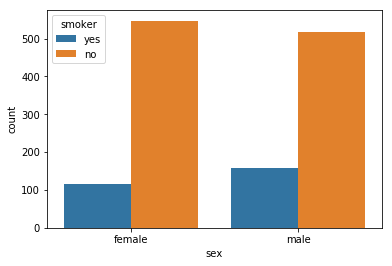

In [21]:
#Is the proportion of smokers significantly different in different genders?
#display graphically the count of Gender with how many  smoker & non smokers
sns.countplot(df['sex'],hue=df['smoker'])
plt.show()

In [29]:
pd.crosstab(df['smoker'],df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [30]:
print("From above we can see that 547 females are not smoker and 115 females are smoker,like wise 517 males are not smoker and 159 males are smoke")

From above we can see that 547 females are not smoker and 115 females are smoker,like wise 517 males are not smoker and 159 males are smoke


In [31]:
#Null Hypothesis--> H0 = "there is no difference in proportion of smokers in different genders"
#Alternate hypothesis--> H1 = "there is difference in proportion of smokers in different genders" 

#E11= expected value of smoker=no and sex=female
#E12 = expected value of smoker=no and sex= male
#E21 = expected value of smoker=yes and sex= female
#E22 = expected value of smoker=yes and sex= male

E11 = 1064*(662/1338)
print("expected value of smoker=no and sex=female is {}".format(E11))
E12 = 1064*(676/1338)
print("expected value of smoker=no and sex= male is {}".format(E12))
E21 = 274*(662/1338)
print("expected value of smoker=yes and sex= female is {}".format(E21))
E22 = 274*(676/1338)
print("expected value of smoker=yes and sex= male is {}".format(E22))

#chi-square = summation((observed-expected)^2/expected)
chiE11 = np.square(547-E11)/E11
print("chiE11 is {}".format(chiE11))
chiE12 = np.square(517-E12)/E12
print("chiE12 is {}".format(chiE12))
chiE21 = np.square(115-E21)/E21
print("chiE21 is {}".format(chiE21))
chiE22 = np.square(159-E22)/E22
print("chiE22 is {}".format(chiE22))

chisquare = chiE11+chiE12+chiE21+chiE22
print("chi-square is {}".format(chisquare))

degree_of_freedom = (2-1)*(2-1)
print("degree of freedom is {}".format(degree_of_freedom))

#having calculated the chi square value and degree of freedom ,we consult a chi-square
#table to check whether the chi square statistics of 7.76 exceeds the critical value
#of the chi square distribution, The critical value for alpha of 0.05(95% confidence) is 3.84
#since the statistics is much larger than 3.84, we have sufficient evidence to reject the H0(null hypothesis)

if chisquare<3.84:
    print("there is no difference in proportion of smokers in different genders(accept H0)")
else:
    print("there is difference in proportion of smokers in different genders(reject H0)")

expected value of smoker=no and sex=female is 526.4334828101644
expected value of smoker=no and sex= male is 537.5665171898356
expected value of smoker=yes and sex= female is 135.56651718983557
expected value of smoker=yes and sex= male is 138.43348281016443
chiE11 is 0.8034854224352866
chiE12 is 0.7868451917931356
chiE21 is 3.120103976172045
chiE22 is 3.0554864382039844
chi-square is 7.765921028604452
degree of freedom is 1
there is difference in proportion of smokers in different genders(reject H0)


In [32]:
#Is the distribution of bmi across women with no children, one child and two children, the same ?
#Null Hypothesis--> H0 = "The distribution of bmi across women with no children,one child and two children is not same"
#Alternate hypothesis--> H1 = "The distribution of bmi across women with no children,one child and two children is same"

#make the data frame of females having children less than or equal to 2

df1 = df[(df['children']<=2) & (df['sex']=='female')]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
20,60,female,36.005,0,no,northeast,13228.84695
21,30,female,32.400,1,no,southwest,4149.73600
23,34,female,31.920,1,yes,northeast,37701.87680


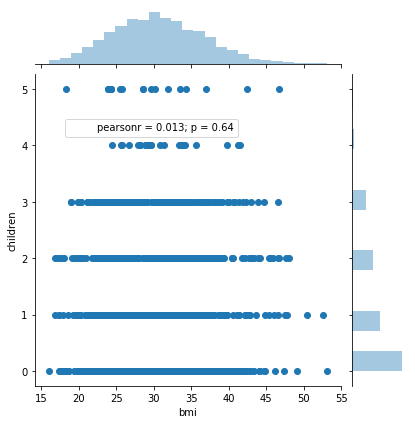

In [33]:
#plot the graph between bmi and children
jp = sns.jointplot(df['bmi'],df['children'])
jp = jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.8))
plt.show()

In [36]:
print("From above we can see that p_value is 0.79 which means that The distribution of bmi across women with no children,one child and two children is same and we reject H0 (Null Hypothesis")

From above we can see that p_value is 0.79 which means that The distribution of bmi across women with no children,one child and two children is same and we reject H0 (Null Hypothesis
